# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\dongt\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


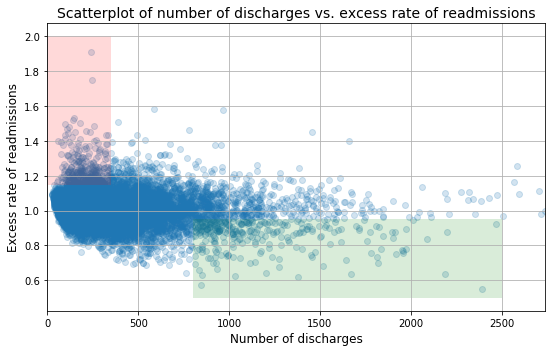

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Critique and Discussions

In [38]:
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio', 
                                   'Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']]
df = df.dropna()

To test correlation between the parameters, we can simply use the pearson formular. 

In [8]:
pearson_r = np.corrcoef(df['Excess Readmission Ratio'], df['Number of Discharges'])[0,1]
pearson_r

-0.097397943510793533

The correlation is negative that seem to support the preliminary analysis about the trend. However, the correlation coefficient is too small to definitely use the trend for prediction. 

In this case, a statistic analysis is requried to examine the significance the difference between the number of discharges that is smaller than 100 and that is larger than 1000. So our hypothesis is:
- H0: There is no difference in the excess readimission ratio.
- Ha: There is difference in the excess readmission ratio.

In [9]:
# dataset that 'number of discharges' is smaller than 100
df_100 = df['Excess Readmission Ratio'][df['Number of Discharges'] < 100]

# dataset that 'number of discharges' is greater than 1000
df_1000 = df['Excess Readmission Ratio'][df['Number of Discharges'] > 1000]

In [37]:
# two sample mean difference
diff_mean = df_100.mean() - df_1000.mean()

# two sample mean comparison statistic calculation
def two_sample_mean(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    mu1 = data1.mean()
    mu2 = data2.mean()
    var1 = np.var(data1)
    var2 = np.var(data2)
    std_diff = np.sqrt(var1/n1 + var2/n2)
    z = abs((diff_mean) / std_diff)
    p_value = stats.norm.cdf(-z)
    moe = 1.96 * std_diff # 95% confidence
    ci = [diff_mean - moe,  diff_mean + moe]
    return z, p_value, moe, ci

z, p_value, moe, ci = two_sample_mean(df_100, df_1000)
print('z_score:', z)
print('p_value:', p_value)
print('margin of error at 95% confidence:', moe)
print('95% confidence interval:', ci)

z_score: 7.60954591234
p_value: 1.37530295037e-14
margin of error at 95% confidence: 0.0114060079069
95% confidence interval: [0.032876921095145423, 0.055688936908941472]


p-value is about 1e-14 that is much smaller than previously determined alpha of 0.01. So we reject the hypothesis, which means the the diffence in excess readmission ration is significant. However the analysis based on only part of the dataset is problematic in the first place. The results based on partial data are misleading. Even our own tuition looking at the scatter plot can tell what the Pearson coefficient proved earlier. So statistic significance can be misleading if it is now being deducted carefully. We must pay attention to the practical significance always.

While interfential statistics is a wonderful mathematic tool that allow us to quantify the likelihood, we must be careful of not being blind to its limitation.

Now let's take avantage of the pairplot from seaborn package to examint possible relationships among the features. We can clearly see there is strong linear relationship between number of discharges and number of readmissions. However, further analysis is beyond the scope of this excercise.

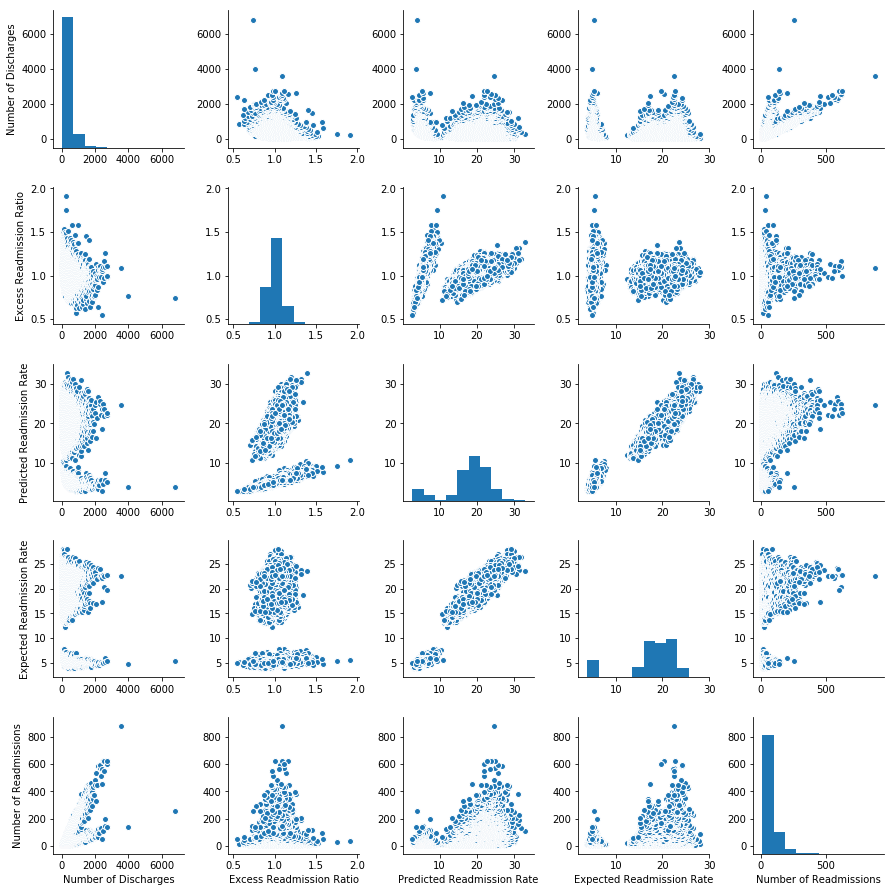

In [19]:
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio', 
                            'Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']]
df = df.dropna()
sns.pairplot(df)
plt.show()